In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
transforms.Compose([
    transforms.ToTensor(), #0 to 255 ==> [0,1)
    transforms.Normalize((0.5,),(0.5),) #0 to 1 ==>[-1 , 1] # when data is zero centered data will learn better , neural network perform better
                         ])

Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=0.5)
)

In [4]:

training_data = datasets.MNIST(
root = 'data',
train = True,
transform = transforms.ToTensor(),
download = True    
)
testing_data = datasets.MNIST(
root = 'data',
train = False,
transform = transforms.ToTensor(),
download = True    
)

In [5]:
len(training_data)

60000

In [6]:
train_loader = DataLoader(training_data,shuffle=True,batch_size=64)
test_loader = DataLoader(testing_data,shuffle=True,batch_size=64)

In [7]:
data_iter = iter(train_loader)
images , labels = next(data_iter)

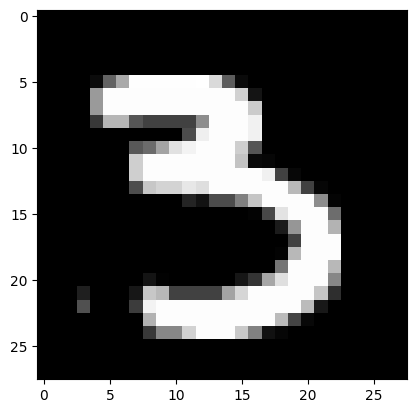

In [8]:
plt.imshow(images[0].squeeze(),cmap = 'gray')

In [9]:
class DigitsClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten( ),
            nn.Linear(784,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)            
        )
    def forward(self, x):
        return self.network(x)

In [10]:
model = DigitsClassifier()
optimizer = optim.Adam(model.parameters(),lr =0.001)
criterion = nn.CrossEntropyLoss() # For MultiClass Classification

In [15]:
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images,labels in train_loader:
        # 1. Forward Loss
        outputs = model(images)
        loss = criterion(outputs,labels)
        running_loss += loss.item()
        # 2. Backward Pass
        optimizer.zero_grad()
        loss.backward()
        # 3. Weight updates
        optimizer.step()
    print(f'Epoch [{epochs+1}/{epochs}], Loss : {running_loss/len(train_loader) : .2f}')
    

Epoch [6/5], Loss :  0.05
Epoch [6/5], Loss :  0.04
Epoch [6/5], Loss :  0.03
Epoch [6/5], Loss :  0.03
Epoch [6/5], Loss :  0.02


In [22]:
model.eval()
total = 0 
correct = 0
with torch.no_grad():
    for images,labels in test_loader:
        outputs = model(images)
        _,predicted = torch.max(outputs.data,1)
        print(torch.max(outputs.data,1))
        correct = correct + (predicted == labels).sum().item()
        total = total + labels.size(0)
print(f'Accuracy on the test set : {100 * correct/ total:.2f}')        
    

torch.return_types.max(
values=tensor([14.8860, 13.4815, 14.8884, 11.6986, 15.3476, 16.4021, 13.1987, 16.5180,
        19.3681, 11.0693, 16.6472, 14.0690, 18.9985,  8.5442, 17.3750, 18.4864,
        17.5640, 14.7416,  9.3785,  8.8169, 10.4823,  5.5939, 18.5433, 23.1740,
        15.6323, 23.9524, 15.0871,  9.6462, 17.2499, 19.7439, 16.3734,  8.7198,
        23.2374, 15.1328, 21.4579, 17.1280, 11.0308, 13.6948, 14.2913, 11.1532,
        13.7845,  9.9486, 22.4531, 10.6671, 13.1064,  9.7227,  9.1967, 18.8605,
         9.9864, 10.4384, 13.1501, 14.8400, 14.1599, 16.8466, 14.0163, 13.4736,
        14.9352, 15.0437,  7.8418, 12.5195,  7.8551, 21.3433, 10.7802, 15.6233]),
indices=tensor([3, 6, 7, 7, 3, 2, 6, 8, 4, 8, 3, 9, 0, 2, 8, 0, 4, 0, 8, 1, 3, 8, 0, 5,
        9, 5, 0, 2, 3, 7, 3, 9, 2, 8, 3, 7, 6, 5, 9, 9, 4, 6, 5, 6, 2, 1, 4, 6,
        8, 6, 4, 4, 9, 4, 3, 2, 9, 7, 5, 4, 1, 7, 2, 4]))
torch.return_types.max(
values=tensor([ 8.4126,  7.0903,  8.1180,  8.2511,  8.2497, 13.8935, 19.9382,

In [23]:
total

10000

In [24]:
correct

9773